**Dataset Link: https://github.com/fpleoni/fashion_mnist/blob/master/fashion-mnist_train.csv**

In [2]:
import pandas as pd

df = pd.read_csv("/home/snu-cse/Documents/Jayashre_3020/fashion-mnist_train.csv")

In [3]:
print(df)

print("--------------------------------")

print(df.describe())

print("--------------------------------")

print(df.info())

print("--------------------------------")

print(df.columns)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [5]:
import numpy as  np

print(np.isnan(df).sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


## Performing PCA on Fashion MNIST Dataset with having the components count as 5

In [7]:
labels = df['label']
pixels = df.drop('label', axis=1)

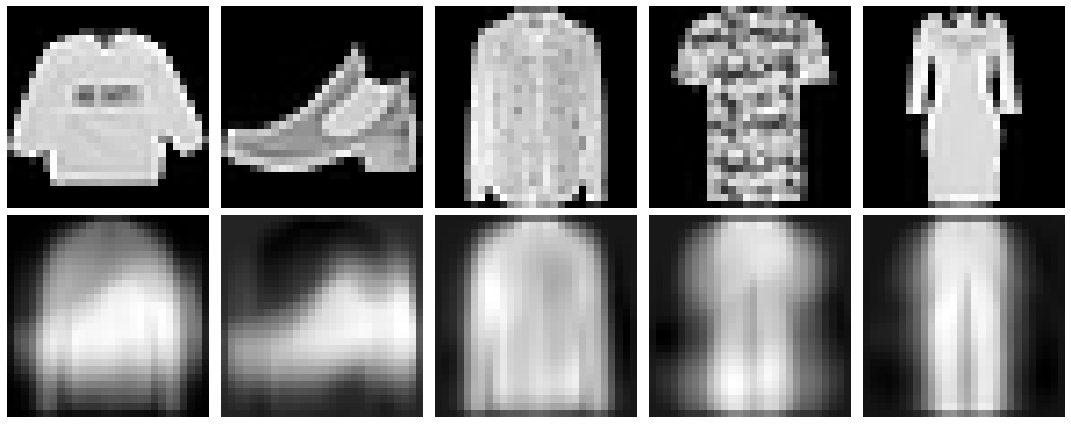

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=5)
pca_result = pca.fit_transform(pixels)

reconstructed = pca.inverse_transform(pca_result)


def plot_images(original, reconstructed):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
    for images, row in zip([original, reconstructed], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape(28, 28), cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()


plot_images(pixels.values[:5], reconstructed[:5])


In [17]:
print('Components:\n', pca.components_)
print(pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(cum_explained_variance)

Components:
 [[ 3.20520499e-07  2.31668579e-06  1.81171337e-05 ...  1.11111748e-03
   9.85641062e-05  1.08814900e-05]
 [-5.16694020e-08  2.93142370e-06  7.86142888e-06 ...  2.43242483e-03
   7.57989986e-04  6.57761867e-05]
 [ 4.01779996e-07  1.92846567e-07  1.51494158e-05 ... -5.52479930e-04
  -1.01539670e-03 -7.41257888e-05]
 [ 3.24676173e-07  1.28565546e-05  6.02009286e-05 ...  6.19049670e-03
   2.55058298e-03  1.76107501e-04]
 [ 1.72301863e-07 -2.66336427e-07 -2.71150494e-07 ... -2.58243709e-03
  -4.06375372e-04  2.49849569e-05]]
[0.29011353 0.17727668 0.060227   0.04970272 0.03839289]
[0.29011353 0.46739022 0.52761721 0.57731993 0.61571282]


**Q: Is there any visible change?**

**Ans: Yes. There is visible change.**

## Checking Whether dataset is class imbalanced or not

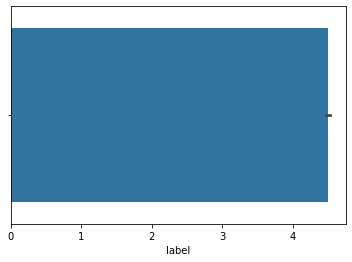

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64


In [15]:
import seaborn as sns

sns.barplot(x = "label", y = None, data = df)
plt.show()

class_counts = df['label'].value_counts().sort_values(ascending=False)
print(class_counts)



## Performing Logistic Regression

In [28]:
X = pixels
Y = labels

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(pca_result)

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_encoded = le.fit_transform(Y)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(pca_result)


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 10.0)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)


0.7039166666666666


## Different Components Count Analysis

In [48]:
def pca_logistic_regression(n_components):
  
  pca = PCA(n_components=n_components)
  pca_result = pca.fit_transform(pixels)
  
  
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(pca_result)
  
 
  le = LabelEncoder()
  Y_encoded = le.fit_transform(labels)
  
  
  X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_encoded, test_size=0.2, random_state=42)
  
  
  model = LogisticRegression(C=10.0)
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  
  
  accuracy = accuracy_score(Y_test, Y_pred)
  return accuracy

In [49]:
num_components_range = range(10, 510, 50)
accuracies = []
for n_components in num_components_range:
  accuracy = pca_logistic_regression(n_components)
  accuracies.append(accuracy)
  print(f"Number of components: {n_components}, Accuracy: {accuracy:.4f}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 10, Accuracy: 0.7604


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 60, Accuracy: 0.8366


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 110, Accuracy: 0.8497


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 160, Accuracy: 0.8521


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 210, Accuracy: 0.8546


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 260, Accuracy: 0.8522


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 310, Accuracy: 0.8532


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 360, Accuracy: 0.8493


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of components: 410, Accuracy: 0.8470
Number of components: 460, Accuracy: 0.8444


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


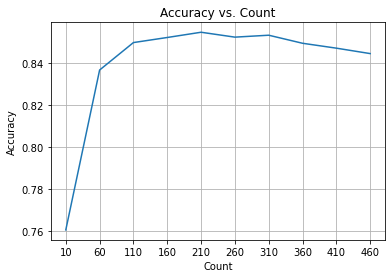

In [50]:
plt.plot(num_components_range, accuracies)
plt.xlabel("Count")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Count")
plt.xticks(num_components_range)
plt.grid(True)
plt.show()

In [51]:
best_component_index = np.argmax(accuracies)
best_n_components = num_components_range[best_component_index]
best_accuracy = accuracies[best_component_index]
print(f"\nBest number of components: {best_n_components}, Best accuracy: {best_accuracy:.4f}")


Best number of components: 210, Best accuracy: 0.8546
